<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/61_Mi_primer_Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Mi Primer Clasificador de Imagenes con Python y Tensorflow - aprendiendo con Ringa Tech**
## **a. Problema**
+ Me acaban de contratar una Tienda de Ropa Internacional y mi primera tarea es desarrollar un modelo de aprendizaje automatico que categorice todos los articulos con base en su fotografia.
+ No conocemos mucho de redes neuronales excepto la parte mas sencilla como es la regresión lineal.
+ Vamos a usar lo apredico en el video anterior: https://www.youtube.com/watch?v=iX_on3VxZzk&list=PLZ8REt5zt2Pn0vfJjTAPaDVSACDvnuGiG

## **b.  Necesitamos cubrir 6 pasos:**
  - **Paso 1. El problema estudiado en el video es un problema de _regresión_,** la salida del modelo o red neuronal es un número, otro ejemplo de regresión sería una red que intente predecir el valor de una casa, recibe como entrada las caracerísticas de la casa y la salida sería el preco estimado, igual manera es un numero.
   - Nuestro problema de hoy es un problema de clasificación, debemos recibir de entrada una imagen y la salida debe decirnos a que categoría pertenece. Si tenemos 10 categorias posibles, nuestra red tendrá 10 neuronas de salida. Y nos deberá decir a que categoría cree que pertenece.
  - **Paso 2. ¿Como damos como entrada una imagen?**
   - Si tomamos una imagen y la convertimos a blanco y negro, podemos dar un valor numérico a cada pixel  {0 = Totalmente negro y 255 = Totalmente blanco}
   - Una imagen de 100 x 100 = 10000 pixeles, cada uno con un valor ente (0,255) y cada uno representararía una neruna en un capa de entrada (10000 neurona en la capa de entrada: casi exagerado).
   - Reduciremos las imagenes al tamaño 28 x 28 = 784 pixeles, es decir, nuestra entrada tendría 784 neuronas.
   - Crearemos una red neuronal con 784 neuronas de entradas y 10 neuronas de salida.
  + **Paso 3. ¿Que tipo de red vamos a utilizar?**
   - Hay muchos tipos de Red que sirven para muchas cosas en especial las Redes Neuronales convolucionales la cual es muy utilizada para la clasificacion de imagenes.
   - Usaremos la _red neuronal densa o regular_ y construiremos sobre ellas
  + **Paso 4. Capas ocultas y funciones de Activación** Son herramientas para resolver problemas mas complejos
  + **Paso5. Capas ocultas** Son Multiplicaciones y sumas, nuestra red cuanteas mas opciones y caminos. En el ejemplo anterior donde se tenia una neurona de sentrada y una de salida habia un peso y un sesgo. Pero si agregamos dos capas ocultas de 3 neuronas cada uno, se tendían 15 pesos y 7 sesgos que permiten tener mas opciones de ajuste.Las capas ocultas siguen siendo lineales.
  + **Paso 6. Para salir de la linealidad**. Usaremos las función de activación llamada ReLU ( $f(x_0)=x_0, x_0>0$ o  $f(x_0)=0, x_0<0$ ) en cada Neurona

## **c. Volvaos al problema**
+ **Nuestra red Tiene:**
 - 784 neuronas en la capa de entrada
 - 10 Neuronas en la capa de salida
 - Inicialmente trabajaremos con dos capas ocultas cada una con 50 Neuronas
+ **Los Datos**. La Tienda _Zalando_una tienda de ropaque se dio a la tarea de crear un set de datos de 70000 imagenes, cada una categorizada correctamente para poder entrenar redes neduronales. Los datos se encuentran en github para su libre usos.
  - Todas son imagenes de 28 x 28 pixeles. Descargaremos estos datos y usaremos 60000 para entrenar a la Red y 10000 para probar que quedo entrenada correctamente.


## **d. Las Librerias para usar**

In [46]:
import tensorflow as tf # Es la libreria para trabajar
import tensorflow_datasets as tfds # aui se encuentran dataset de google para trabajar en especial el Zalandro

## **e. Descargando el set de Datos con sus metadatos**

In [47]:
## **e. Descargando el set de Datos con sus metadatos**
datos, metadatos = tfds.load('fashion_mnist',as_supervised=True, with_info=True)

## **f. Veamos la información descrgada**

In [48]:
## **f. Veamos la información descrgada**
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    

## **g. Colocamos cada conjunto de datos en una variable diferente para utilizarlos**

In [49]:
## **g. Colocamos cada conjunto de datos en una variable diferente para utilizarlos**
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

## **h. Los metadatos traen los nombres de las categorias que existen en el set**
+ Asignemos a una variable y podemos imprimirlos


In [50]:
## **h. Los metadatos traen los nombres de las categorias que existen en el set**
nombres_clases = metadatos.features['label'].names
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## **i. Normalizar los datos (Pasar de 0 - 255 a 0-1)**
+ Todas las entradas las queremos entre 0 y 1

In [51]:
## **i. Normalizar los datos (Pasar de 0 - 255 a 0-1)**
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # aqui los pasa de 0 - 255 a 0 - 1
  return imagenes, etiquetas

# Normalizar los datos de entrenamiento y prueba con la función que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Agregar a cache (Usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()



## **j. Mostrar una imagen de los datos de prueba, de momento mostraremos la primera**

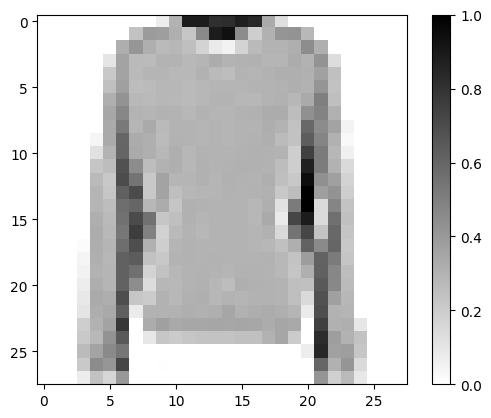

In [52]:
## **j. Mostrar una imagen de los datos de prueba, de momento mostraremos la primera**
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) # Redimensionar, cosas de tensores, lo veremos despues

import matplotlib.pyplot as plt
# Dibujar dibujar

plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


## **k. Mostremos mas imagenes para que nos muestre cual es la categoria propuesta con la que viene etiquetada**

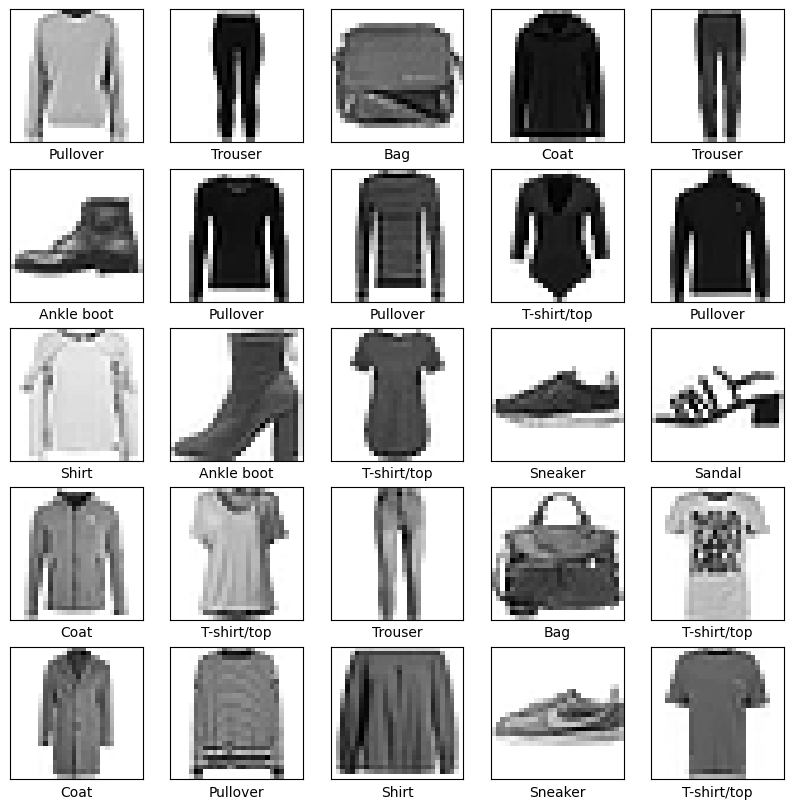

In [53]:
## **k. Mostremos mas imagenes para que nos muestre cual es la categoria propuesta con la que viene etiquetada**
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

## **l. Vamos a Crear nuestro modelo - usaremos una red de tipo secuencial**
- La capa Flatten convierte la matriz en una sola dimensión con 28*28 filas

In [54]:
## **l. Vamos a Crear nuestro modelo - usaremos una red de tipo secuencial**
modelo = tf.keras.Sequential([ # red de tipo secuencial
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 -(28,28,1) blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu), # Dos capas ocultas densas
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion se usa softmax como funcion de activación en la capa de salida
])

## **m. Vamos a Compilar el modelo, usando como optimizador _adam_ y como funcion de pérdida a _SparseCategoricalCrossentropy()_**

In [55]:
## **m. Vamos a Compilar el modelo, usando como optimizador _adam_ y como funcion de pérdida a _SparseCategoricalCrossentropy()_**
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

## **n. Recordemos los numeros de datos en entrenamiento y pruebas (60k y 10k)**

In [56]:
## **n. Recordemos los numeros de datos en entrenamiento y pruebas (60k y 10k)**
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


## **o. Como tenemos 60000 datos para entrenar lo haremos por lotes**

In [57]:
## **Como tenemos 60000 datos para entrenar lo haremos por lotes
# El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

## **p. Al fin vamos a entrenar nuestra Red**
- Comenzamos a entrenar nuestra red usando la función fit
- Al fina se debe termnar con una precisión del 88%

In [58]:
import math

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 12s 2ms/step - loss: 0.5237 - accuracy: 0.8184
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3840 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3515 - accuracy: 0.8723
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3287 - accuracy: 0.8806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3108 - accuracy: 0.8850


## **q. Grafiquemos la función de perdida**
+ Tenemos el modelo listo para ghacer predicciones

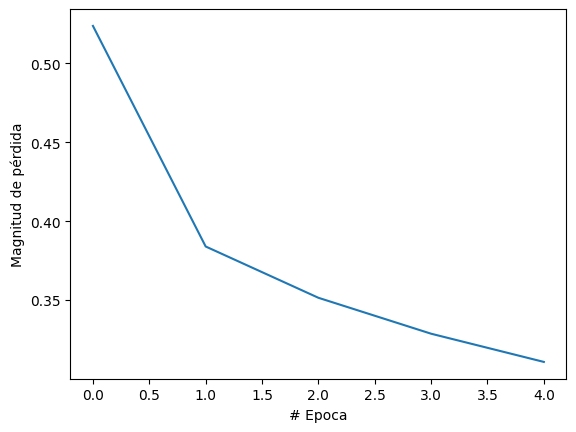

In [59]:
## **q. Grafiquemos la función de perdida**
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

## **r. El siguiente codigo me permitira tomar 25 imagenes para ver que tal predice.**
- **Pintamoa una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)**

1/1 [==============================] - 0s 73ms/step


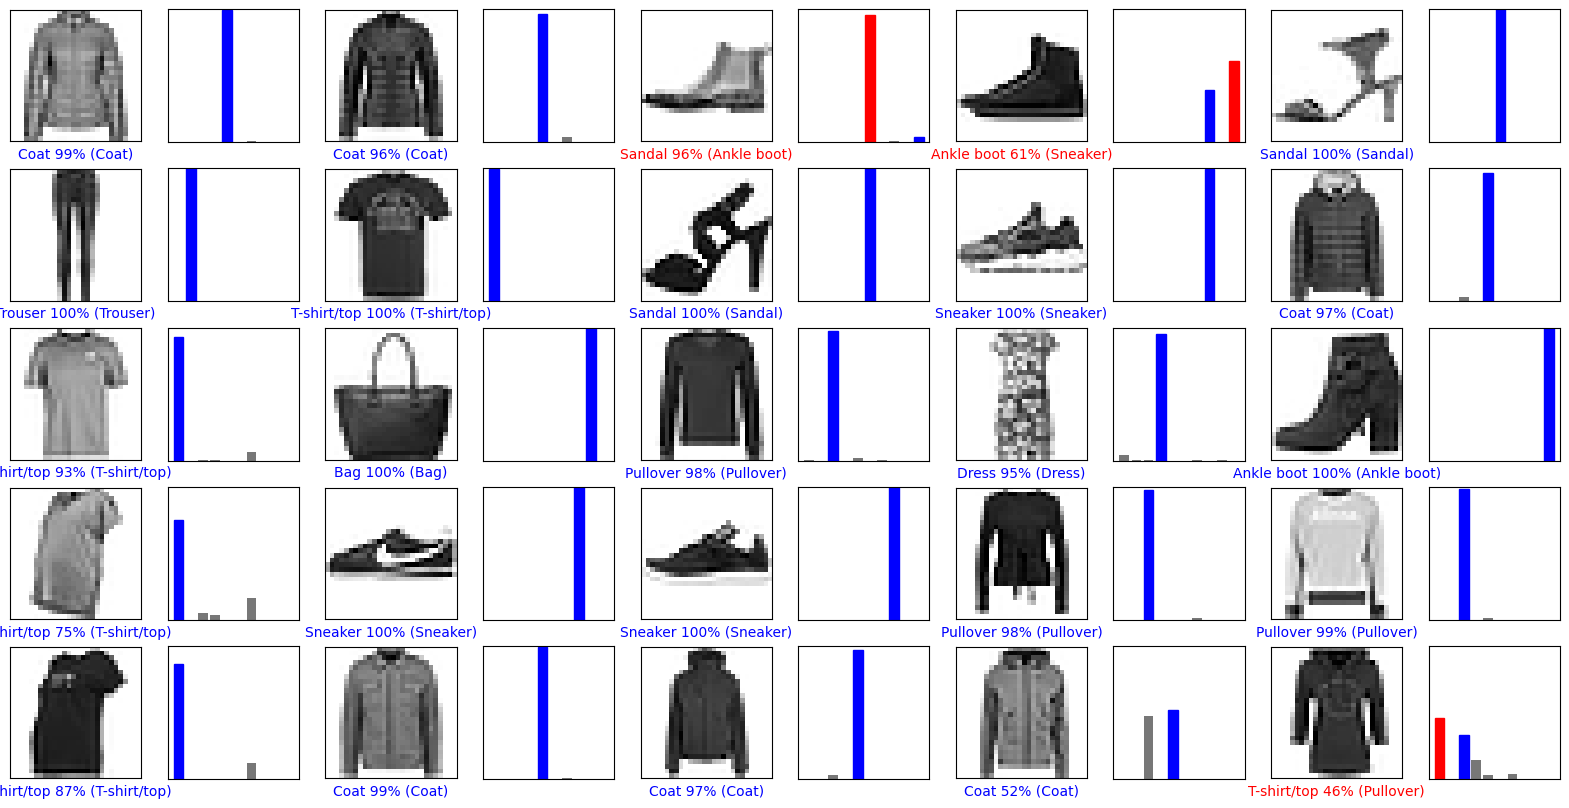

In [60]:
## **r. El siguiente codigo me permitira tomar 25 imagenes para ver que tal predice.
## Pintamoa una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)**
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

## **s. Probar una imagen suelta del set de prueba cualquiera**

In [61]:
## **s. Probar una imagen suelta del set de prueba cualquiera**
imagen = imagenes_prueba[21] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 76ms/step
Prediccion: Coat


## **t. Ya tenemos un clasificador de ropa con 90% de Precisión**

In [62]:
for i in range(0,32):
  imagen = imagenes_prueba[i] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
  imagen = np.array([imagen])
  prediccion = modelo.predict(imagen)
  print(f"Prediccion: {i} " + nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 27ms/step
Prediccion: 0 Coat
1/1 [==============================] - 0s 25ms/step
Prediccion: 1 Coat
1/1 [==============================] - 0s 26ms/step
Prediccion: 2 Sandal
1/1 [==============================] - 0s 27ms/step
Prediccion: 3 Ankle boot
1/1 [==============================] - 0s 25ms/step
Prediccion: 4 Sandal
1/1 [==============================] - 0s 25ms/step
Prediccion: 5 Trouser
1/1 [==============================] - 0s 28ms/step
Prediccion: 6 T-shirt/top
1/1 [==============================] - 0s 44ms/step
Prediccion: 7 Sandal
1/1 [==============================] - 0s 30ms/step
Prediccion: 8 Sneaker
1/1 [==============================] - 0s 27ms/step
Prediccion: 9 Coat
1/1 [==============================] - 0s 29ms/step
Prediccion: 10 T-shirt/top
1/1 [==============================] - 0s 25ms/step
Prediccion: 11 Bag
1/1 [==============================] - 0s 25ms/step
Prediccion: 12 Pullover
1/1 [==============================] - 

## **u. Vamos exportar el modelo que ya probamos para usarlo con un tensorfllowsjs**

In [63]:
## **u. Vamos exportar el modelo que ya probamos para usarlo con un tensorfllowsjs**
modelo.save('modelo_exportado.h5')

## **v. Instalar tensorflowjs para convertir el modelo a un modelo que pueda cargar tensorflowjs en un explorador**

In [64]:
## **v. Instalar tensorflowjs para convertir el modelo a un modelo que pueda cargar tensorflowjs en un explorador**
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Succ

In [68]:
#Convertir el archivo h5 a formato de tensorflowjs
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

mkdir: cannot create directory ‘tfjs_target_dir’: File exists
2023-08-16 20:54:27.833719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [66]:
#Veamos si si creo la carpeta
!ls

modelo_exportado.h5  sample_data  tfjs_target_dir


In [70]:
#Veamos el contenido de la carpeta
!ls tfjs_target_dir

group1-shard1of1.bin  model.json
